In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, ode

%matplotlib inline

<img src='https://i.ytimg.com/vi/P1X-WpfUvm4/maxresdefault.jpg' />

## Part 1

$$ \frac{dN}{dt} = \frac{\alpha N^{2}}{N + 1} - \beta N - \gamma N^{2} $$

In [2]:
br = 128 # birth rate
dr = 90  # death rate
cr = 2   # inner competiton

$$ a = \frac{-\sqrt{(\alpha - \beta - \gamma)^2 - 4\beta\gamma} - \alpha + \beta + \gamma}{-2\gamma} $$
$$ b = \frac{\sqrt{(\alpha - \beta - \gamma)^2 - 4\beta\gamma} - \alpha + \beta + \gamma}{-2\gamma} $$
$$ K = min(a, b) $$
$$ L = max(a, b) $$

In [3]:
s = br - dr - cr
c = (s**2 - 4*dr*cr)**0.5
a, b = (-c-s) / -2 / cr, (c-s) / -2 / cr
L, K = min(a, b), max(a, b)
print('Lower bound is {:.2f} and upper bound is {:.2f}'.format(L, K))

Lower bound is 3.00 and upper bound is 15.00


In [4]:
options = [
    [1/4 * L,       '< L/2'],
    [3/4 * L,       '> L/2'],
    [L,             '= L'],
    [1/4 * (K + L), '< (K + L)/2'],
    [3/4 * (K + L), '> (K + L)/2'],
    [K,             '= K'],
    [1.25 * K,      '> K']
]

def f(t, N):
    return br * N**2 / (N + 1) - dr*N - cr * N**2

/opt/conda/lib/python3.6/site-packages/scipy/integrate/_ivp/rk.py:145: RuntimeWarning: divide by zero encountered in double_scalars
  max(1, SAFETY * error_norm ** (-1 / (order + 1))))


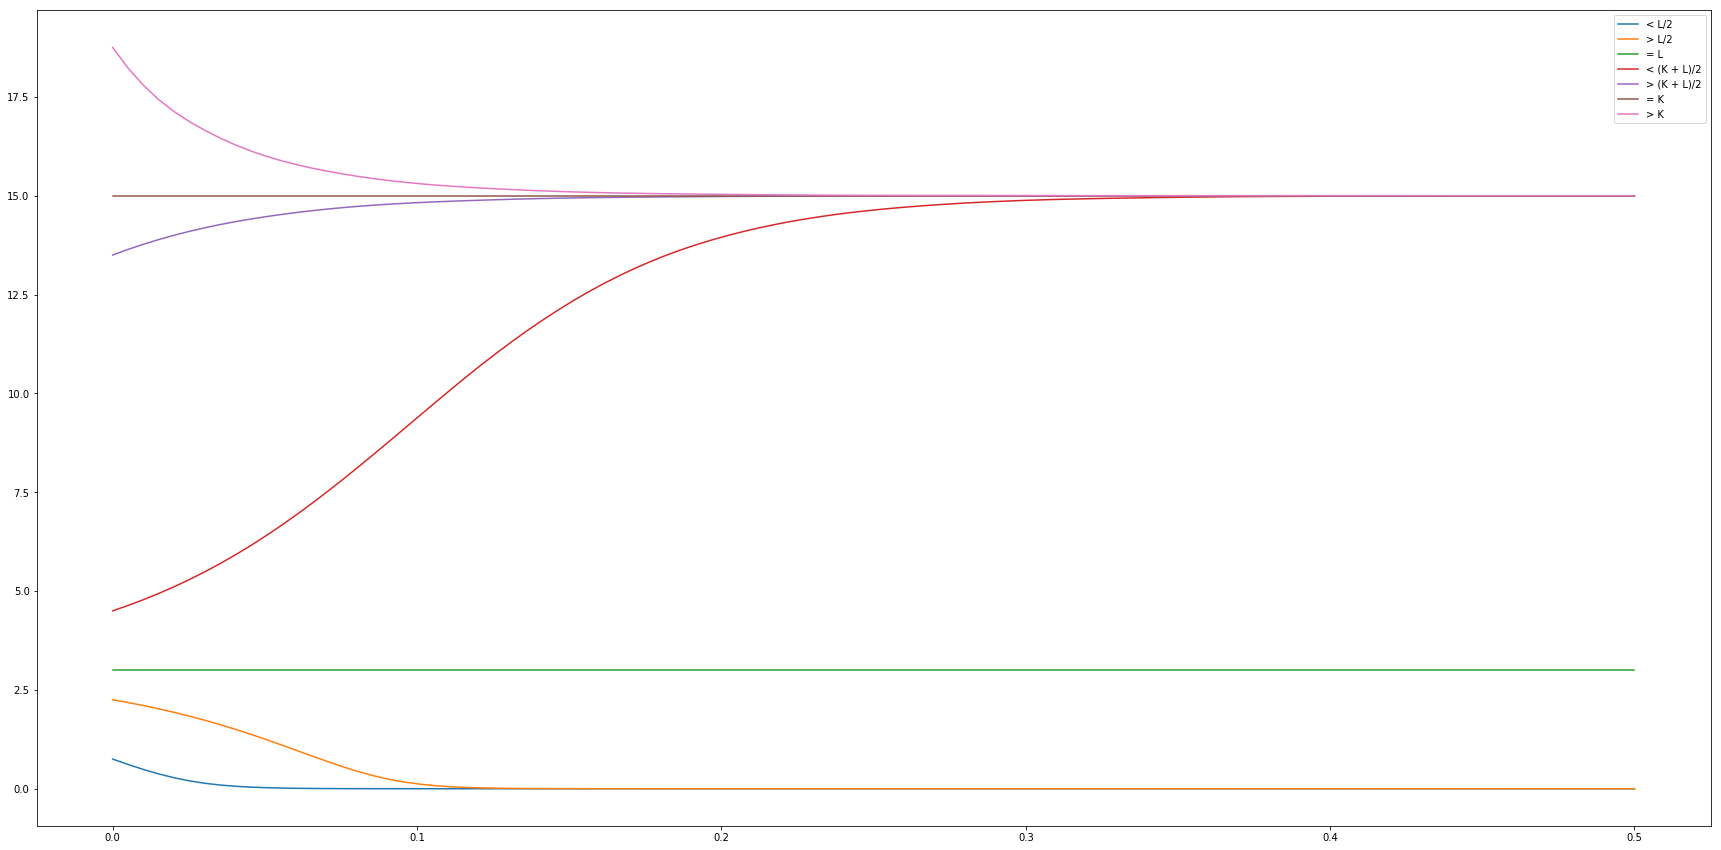

In [5]:
bounds = [0, 0.5] 
t = np.linspace(*bounds, 100)

plt.figure(figsize=(30, 15))
for N0, label in options:
    N = solve_ivp(f, bounds, [N0], t_eval=t).y[0]
    plt.plot(t, N, label=label)
plt.legend(); plt.show()

## Part 2

$$ \frac{dN}{dt} = -0.056N + 0.0004N^2 $$

In [6]:
options = [
    [100, "N(0) = 100"],
    [140, "N(0) = 140"],
    [180, "N(0) = 180"]
]

def f(t, N):
    return -0.056 * N + 0.0004 * (N**2)

/opt/conda/lib/python3.6/site-packages/scipy/integrate/_ivp/rk.py:145: RuntimeWarning: divide by zero encountered in double_scalars
  max(1, SAFETY * error_norm ** (-1 / (order + 1))))


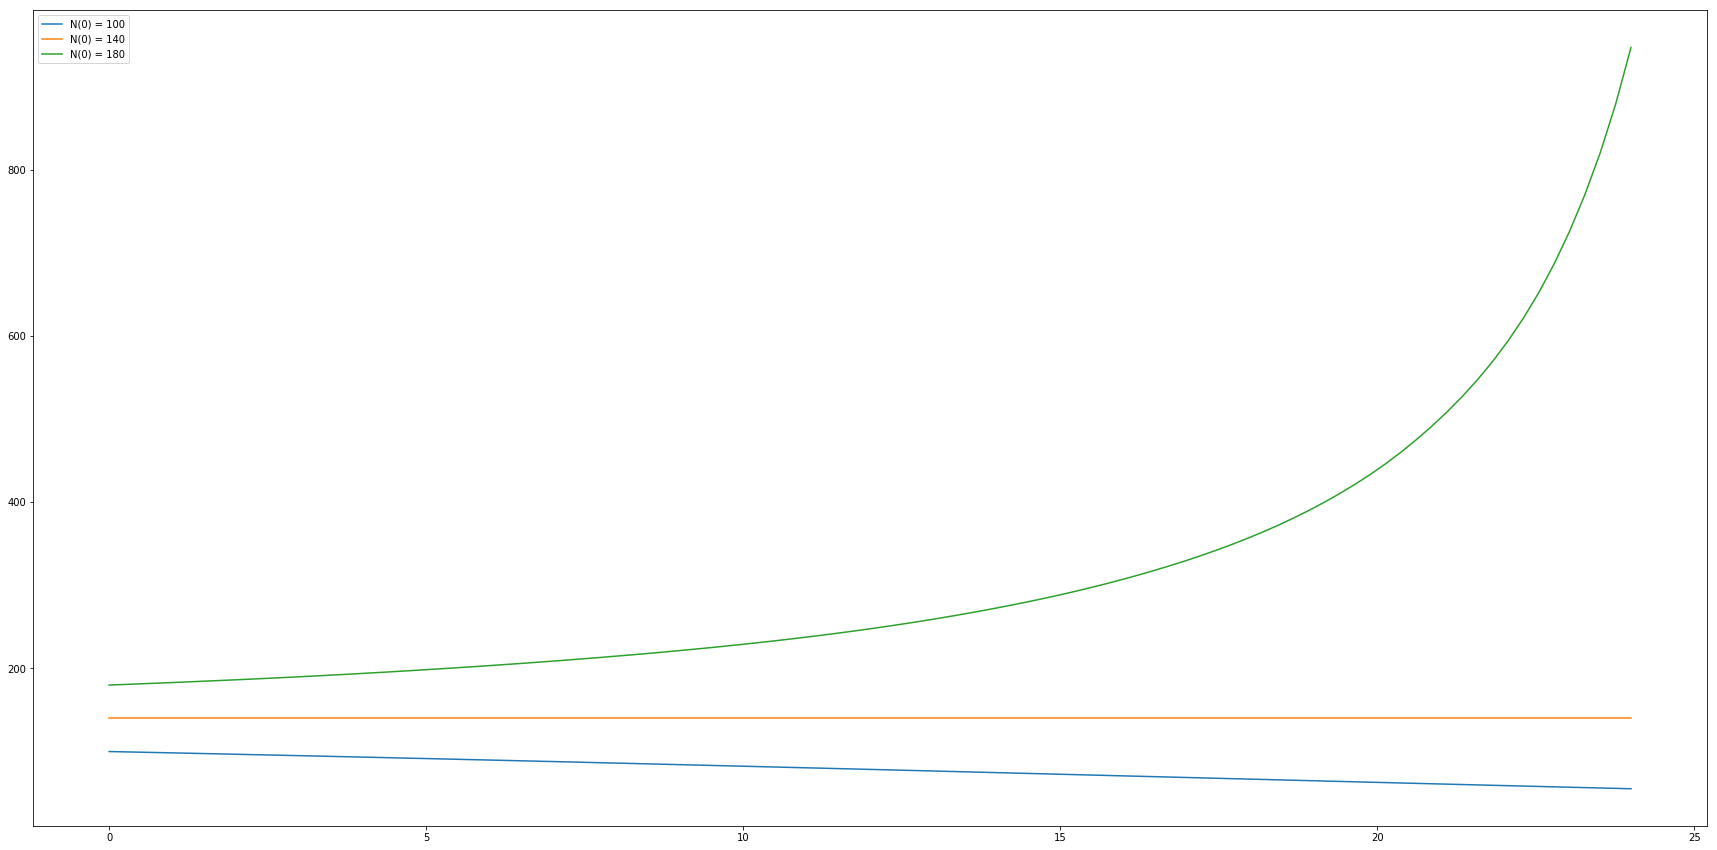

In [7]:
bounds = [0, 24]
t = np.linspace(*bounds, 100)

plt.figure(figsize =(30, 15))
for N0, label in options:
    N = solve_ivp(f, bounds, [N0], t_eval=t).y[0]
    plt.plot(t, N, label=label)
plt.legend(); plt.show()